In [11]:
import numpy as np
import matplotlib.pyplot as plt

## generate data

In [12]:
num_samples,bias = 100,1.1
# make a simple unit circle 
theta = np.linspace(0, 2*np.pi, num_samples)
# make 2 circles with different labels
r1,r2 = np.random.rand((num_samples)),np.random.rand((num_samples))
x1, y1 = (r1 * np.cos(theta)).reshape(-1, 1), (r1 * np.sin(theta)).reshape(-1, 1)
x2, y2 = (r2 * np.cos(theta) + bias).reshape(-1, 1), (r2 * np.sin(theta) + bias).reshape(-1, 1)

s1 = np.hstack([x1,y1, np.ones_like(x1)])
s2 = np.hstack([x2,y2, np.zeros_like(x2)])
data = np.vstack([s1,s2])
data= np.hstack([np.ones([data.shape[0],1]),data])

### split data

In [13]:
np.random.shuffle(data)
# 70/30
split_ind = int(np.floor((num_samples*7)/10))
split_ind
train,test = data[split_ind:],data[:split_ind]
(x_train,y_train) = (train[:,:data.shape[1]-1],train[:,-1])
(x_test,y_test) = (test[:,:data.shape[1]-1],test[:,-1])

### sigmoid function

In [14]:
def sigma(x,theta):
    h = x.dot(theta)
    return 1.0 / (1 + np.exp(-h))

In [15]:
def accuracy(probability, y_true):
    return sum([1 if p>0.5 else 0 for p in probability]==y_true)/len(y_true)

In [16]:
# the same func as in the linear regression
def gradient_descent(rate,data,label,iter=1000):
    # initialise theta with zeros
    theta = np.zeros(data.shape[1],)
    m = data.shape[0]
    # main part of optimization
    for _ in range(iter):
        # current prediction (theta from the previos step)
        current_pred = sigma(data,theta)
        # updating weights
        theta -= (rate/m)*(data.T.dot((current_pred - label)))
    return theta

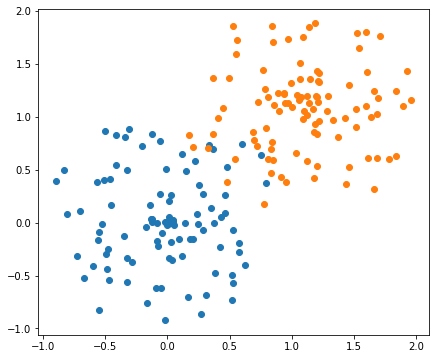

In [17]:
# plots
plt.figure(figsize=(7,6))
plt.scatter(x1, y1, marker='o', linestyle='-', label='Samples')
plt.scatter(x2, y2, marker='o', linestyle='-', label='Samples')

## train model

In [18]:
alpha = 0.01
iter = 5000
theta = gradient_descent(alpha,x_train,y_train,iter)
print(theta)

[ 2.20264979 -2.76678125 -1.97162759]


### accuracy

In [19]:
prediction_test = sigma(x_test,theta)
accuracy_test = accuracy(prediction_test,y_test)
accuracy_test

0.9714285714285714

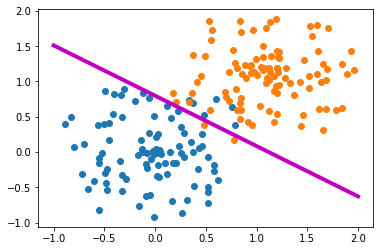

In [20]:
x = np.linspace(-1,2, 20)
y = -(theta[2]*x+theta[0])/theta[1]
plt.scatter(data[:,1][data[:,3] ==1], data[:,2][data[:,3] ==1] )
plt.scatter(data[:,1][data[:,3] ==0], data[:,2][data[:,3] ==0])
plt.plot(x,y,'m',linewidth=4)